## Name : Priyank Maheshwari
## Section : A
## Roll No. : 52
## Subject : Computer Vision

## AIM : Implement the SIFT algorithm to detect and match key points between two images.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('flower1.jpg')
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('flower2.jpg')
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

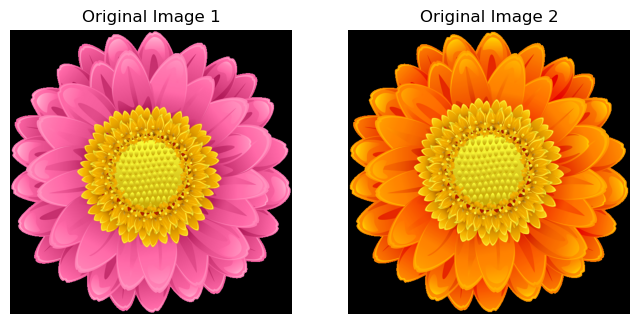

In [3]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original Image 1")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Original Image 2")
plt.axis('off')
plt.show()

In [4]:
sift = cv2.SIFT_create()

In [5]:
kp1 , ds1 = sift.detectAndCompute(img1,None)
kp2 , ds2 = sift.detectAndCompute(img2,None)

In [6]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(ds1,ds2,k=2)

In [7]:
good_matches = []

for m,n in matches :
    if m.distance < 0.6 * n.distance :
        good_matches.append(m)

In [8]:
img_matched = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

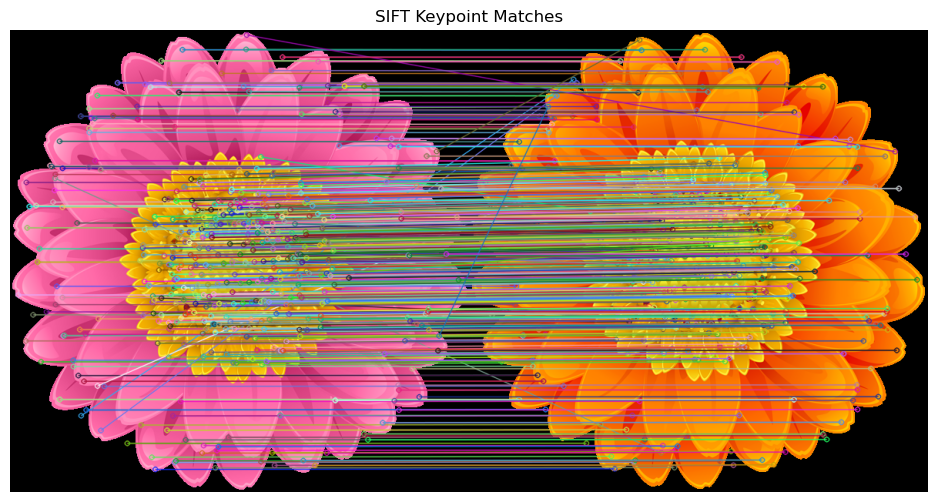

In [9]:
plt.figure(figsize=(12,6))
plt.imshow(img_matched)
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()

### Changing the threshold and observing changes .

In [10]:
good_matches = []

for m,n in matches :
    if m.distance < 0.8 * n.distance :
        good_matches.append(m)

In [11]:
img_matched = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

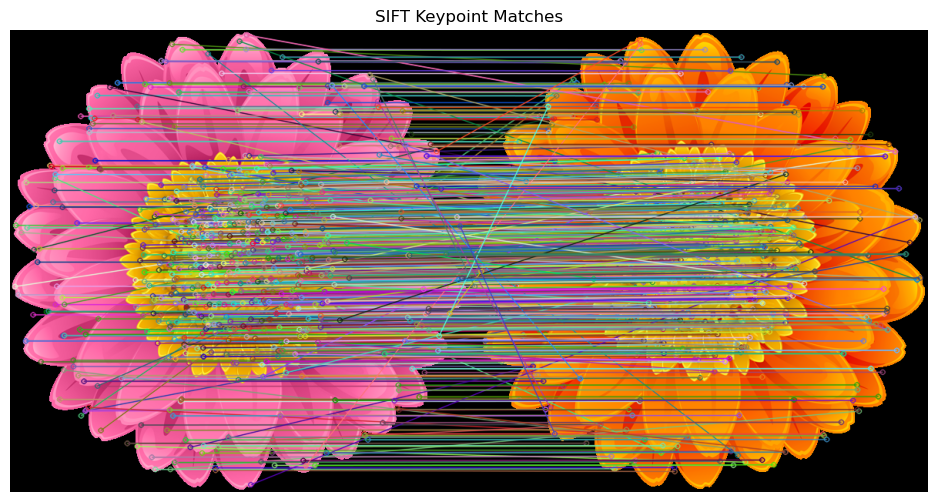

In [12]:
plt.figure(figsize=(12,6))
plt.imshow(img_matched)
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()

## Conclusion :
## As the ratio threshold was increased from 0.60 to 0.80, a noticeable rise in the number of matched keypoints was observed. While the higher threshold allowed for detecting more correspondences, it also introduced several incorrect or weak matches, resulting in a denser but less reliable visualization. On the other hand, the stricter threshold (0.60) yielded fewer matches but with better precision, highlighting only the most confident keypoint pairs. This demonstrates the trade-off between match quantity and match quality when tuning the ratio parameter in SIFT.